In [9]:
import numpy as np
import graspy as gp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import adjusted_rand_score

In [10]:
a = 0.01
b = 0.02
c = 0.01
d = 0.002
e = 0.1
f = 0.002
g = 0.015

# a = 0.5
# b = a / 2
# c = a / 20
# d = a 
# e = 1.5 * a
# f = 1.25 * a
# g = a / 2

B = np.array([
    [a, b, c, d],
    [b, e, f, g],
    [c, f, a, b],
    [d, g, b, e]
])

projection1 = np.array([
    [np.mean(B[:2,:2]), np.mean(B[:2,2:])],
    [np.mean(B[:2,2:]), np.mean(B[2:,2:])],
])
print(projection1)

projection2 = np.array([
    [np.mean([a, c, c, a]), np.mean([b, d, f, b])],
    [np.mean([b, d, f, b]), np.mean([e, g, g, e])]
])

print(projection2)

[[0.0375  0.00725]
 [0.00725 0.0375 ]]
[[0.01   0.011 ]
 [0.011  0.0575]]


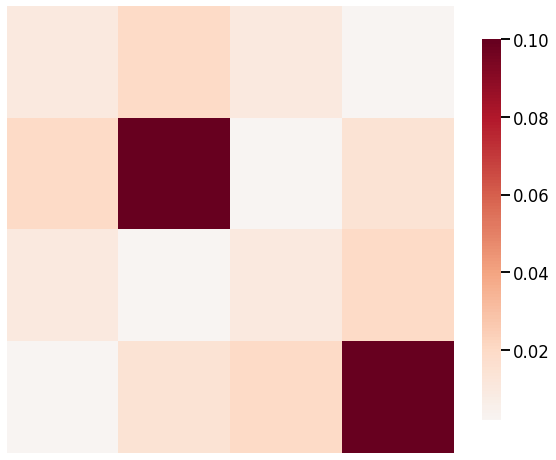

In [11]:
gp.plot.heatmap(B)

In [12]:
n = 10000
p = 0.25
pi = np.array([p, p, p, p])
A = gp.simulations.sbm((n*pi).astype(int), B)

affinity_labels = np.array(['L'] * (n//2) + ['R'] * (n//2)) #left right
core_labels = np.tile(["G"] * (n//4) + ["W"] * (n//4), 2) # gray white

#n_components = 2

lse = gp.embed.LaplacianSpectralEmbed().fit_transform(
    gp.utils.augment_diagonal(A)
)
ase = gp.embed.AdjacencySpectralEmbed().fit_transform(A)

In [13]:
affinity = ['euclidean','manhattan','none']
lse_gmm = gp.cluster.AutoGMMCluster(2, 2, affinity=affinity).fit_predict(lse)
ase_gmm = gp.cluster.AutoGMMCluster(2, 2, affinity=affinity).fit_predict(ase)

# lse_gmm = gp.cluster.GaussianCluster(2, 2).fit_predict(lse)
# ase_gmm = gp.cluster.GaussianCluster(2, 2).fit_predict(ase)

AttributeError: module 'graspy.cluster' has no attribute 'AutoGMMCluster'

In [10]:
adjusted_rand_score(lse_gmm, affinity_labels)

1.0

In [11]:
adjusted_rand_score(lse_gmm, core_labels)

-0.00010002000400086611

In [12]:
adjusted_rand_score(ase_gmm, affinity_labels)

0.249943740154527

In [13]:
adjusted_rand_score(ase_gmm, core_labels)

0.249943740154527

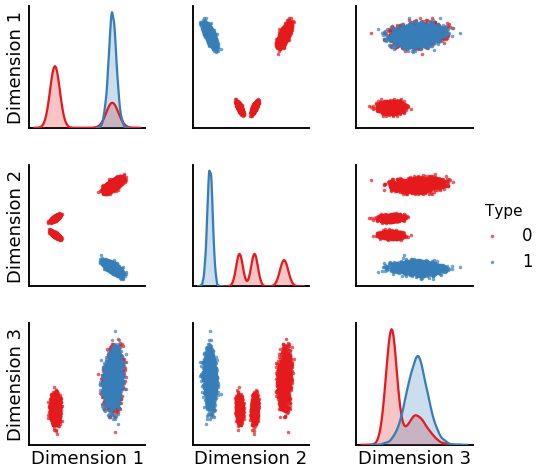

In [14]:
gp.plot.pairplot(ase, labels=ase_gmm)

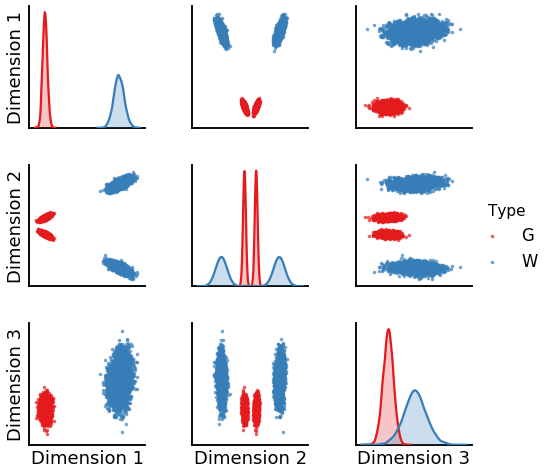

In [15]:
gp.plot.pairplot(ase, labels=core_labels)

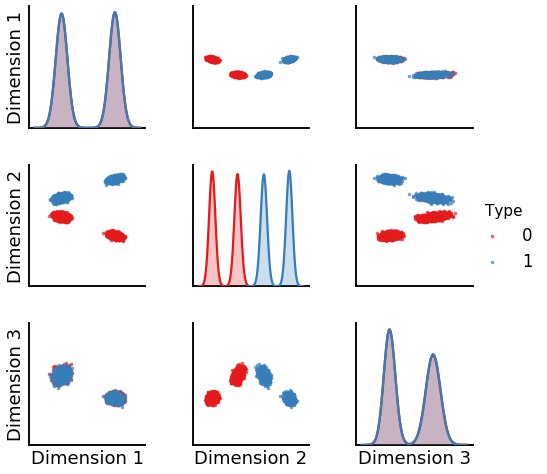

In [16]:
gp.plot.pairplot(lse, labels=lse_gmm)

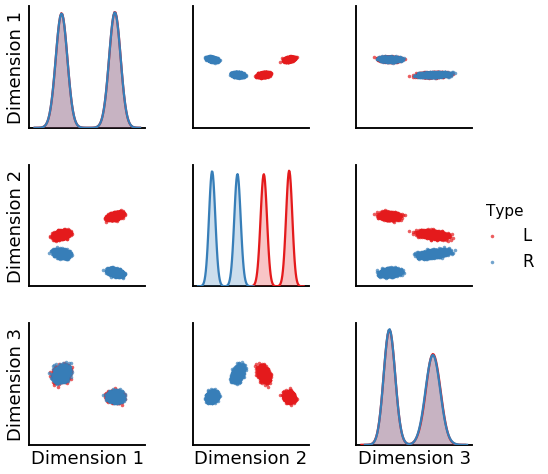

In [17]:
gp.plot.pairplot(lse, labels=affinity_labels)